In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN, AgglomerativeClustering, AffinityPropagation


In [4]:
df = pd.read_csv("dataset_encoded_features.csv")

In [5]:
col1 = "drives_per_driving_day"
col2 = "km_per_drive"
X = df[[col1, col2]]

In [15]:
db = DBSCAN().fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 189
Estimated number of noise points: 5353


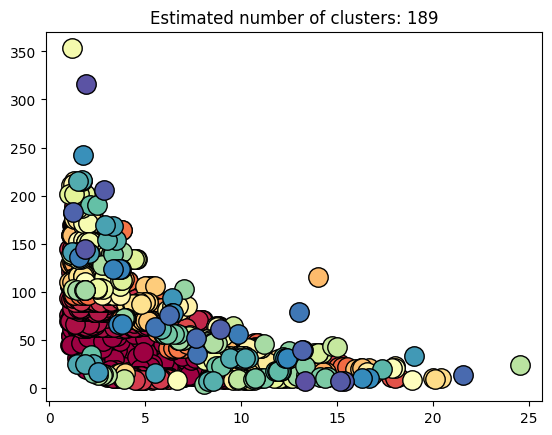

In [16]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[col1],
        xy[col2],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    # xy = X[class_member_mask & ~core_samples_mask]
    # plt.plot(
    #     xy[col1],
    #     xy[col2],
    #     "o",
    #     markerfacecolor=tuple(col),
    #     markeredgecolor="k",
    #     markersize=6,
    # )

    

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

DBSCAN не подходит...

In [44]:
clustering = AgglomerativeClustering().fit(X)

In [45]:
clustering.n_clusters

2

In [47]:
X["label"] = clustering.labels_

/var/folders/33/6b7rxwb96hd5gbjscmrzv1qh0000gq/T/ipykernel_17811/1348637921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = clustering.labels_


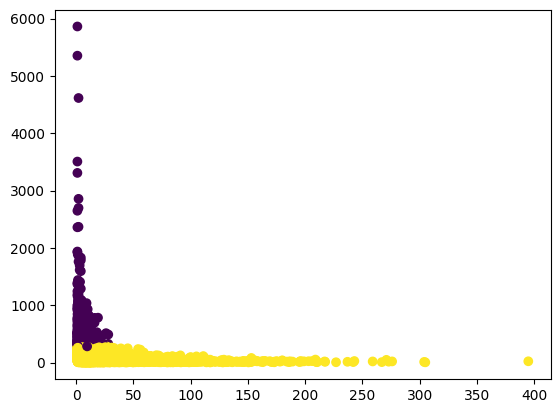

In [48]:
plt.scatter(X[col1], X[col2], c=X["label"])

In [49]:
X.drop(columns=["label"], inplace=True)

/var/folders/33/6b7rxwb96hd5gbjscmrzv1qh0000gq/T/ipykernel_17811/204715726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["label"], inplace=True)


In [53]:
clustering = AffinityPropagation(random_state=5).fit(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [54]:
X["label"] = clustering.labels_

/var/folders/33/6b7rxwb96hd5gbjscmrzv1qh0000gq/T/ipykernel_17811/1348637921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = clustering.labels_


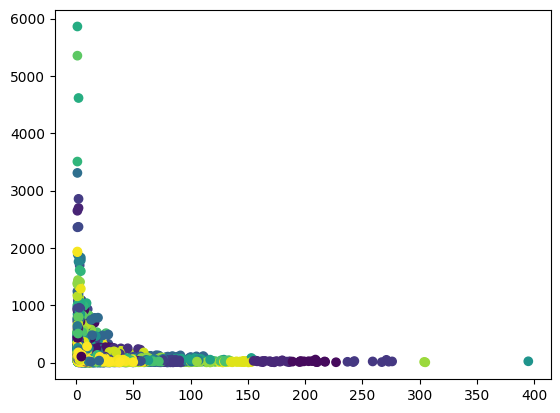

In [55]:
plt.scatter(X[col1], X[col2], c=X["label"])